This is a companion notebook for the book [Deep Learning with Python, Second Edition](https://www.manning.com/books/deep-learning-with-python-second-edition?a_aid=keras&a_bid=76564dff). For readability, it only contains runnable code blocks and section titles, and omits everything else in the book: text paragraphs, figures, and pseudocode.

**If you want to be able to follow what's going on, I recommend reading the notebook side by side with your copy of the book.**

This notebook was generated for TensorFlow 2.6.

# Fundamentals of machine learning

## Generalization: The goal of machine learning

### Underfitting and overfitting

#### Noisy training data

#### Ambiguous features

#### Rare features and spurious correlations

**Adding white-noise channels or all-zeros channels to MNIST**

In [ ]:
from tensorflow.keras.datasets import mnist
import numpy as np

(train_images, train_labels), _ = mnist.load_data()
train_images = train_images.reshape((60000, 28 * 28))
train_images = train_images.astype("float32") / 255

train_images_with_noise_channels = np.concatenate(
    [train_images, np.random.random((len(train_images), 784))], axis=1)

train_images_with_zeros_channels = np.concatenate(
    [train_images, np.zeros((len(train_images), 784))], axis=1)

In [ ]:
train_images.shape

(60000, 784)

In [ ]:
train_images_with_noise_channels.shape # noise 랜덤 을 추가해서 더블됨

(60000, 1568)

In [ ]:
train_images_with_zeros_channels.shape # noise 랜덤 을 추가해서 더블됨

(60000, 1568)

**Training the same model on MNIST data with noise channels or all-zero channels**

In [ ]:
from tensorflow import keras
from tensorflow.keras import layers

def get_model():
    model = keras.Sequential([
        layers.Dense(512, activation="relu"),
        layers.Dense(10, activation="softmax")
    ])
    model.compile(optimizer="rmsprop",
                  loss="sparse_categorical_crossentropy",
                  metrics=["accuracy"])
    return model

model = get_model()
history_noise = model.fit(
    train_images_with_noise_channels, train_labels,
    epochs=10,
    batch_size=128,
    validation_split=0.2)

model = get_model()
history_zeros = model.fit(
    train_images_with_zeros_channels, train_labels,
    epochs=10,
    batch_size=128,
    validation_split=0.2)

Epoch 1/10
375/375 [==============================] - 4s 5ms/step - loss: 0.6185 - accuracy: 0.8112 - val_loss: 0.3032 - val_accuracy: 0.9086
Epoch 2/10
375/375 [==============================] - 1s 3ms/step - loss: 0.2503 - accuracy: 0.9230 - val_loss: 0.1869 - val_accuracy: 0.9435
Epoch 3/10
375/375 [==============================] - 1s 4ms/step - loss: 0.1651 - accuracy: 0.9485 - val_loss: 0.1557 - val_accuracy: 0.9524
Epoch 4/10
375/375 [==============================] - 1s 3ms/step - loss: 0.1152 - accuracy: 0.9645 - val_loss: 0.1583 - val_accuracy: 0.9525
Epoch 5/10
375/375 [==============================] - 1s 3ms/step - loss: 0.0852 - accuracy: 0.9741 - val_loss: 0.1142 - val_accuracy: 0.9657
Epoch 6/10
375/375 [==============================] - 2s 4ms/step - loss: 0.0611 - accuracy: 0.9806 - val_loss: 0.1307 - val_accuracy: 0.9630
Epoch 7/10
375/375 [==============================] - 2s 6ms/step - loss: 0.0465 - accuracy: 0.9849 - val_loss: 0.1238 - val_accuracy: 0.9665
Epoch 

**Plotting a validation accuracy comparison**

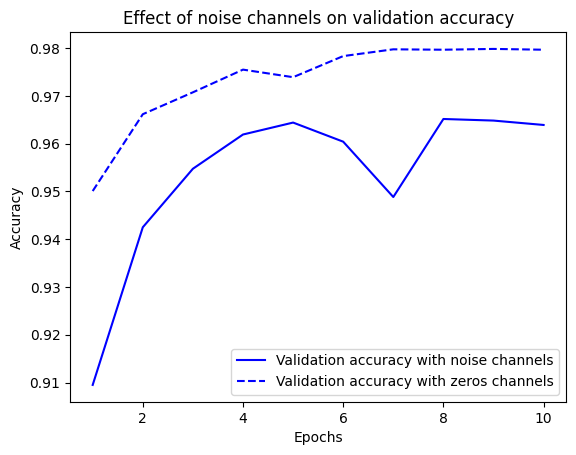

In [ ]:
import matplotlib.pyplot as plt
val_acc_noise = history_noise.history["val_accuracy"]
val_acc_zeros = history_zeros.history["val_accuracy"]
epochs = range(1, 11)
plt.plot(epochs, val_acc_noise, "b-",
         label="Validation accuracy with noise channels")
plt.plot(epochs, val_acc_zeros, "b--",
         label="Validation accuracy with zeros channels")
plt.title("Effect of noise channels on validation accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
#성능 별로 안 좋음 오리지널 데이터 vs. add validation accuracy 비교해본게 - ppt.4쪽 그래프 2

### The nature of generalization in deep learning

**Fitting a MNIST model with randomly shuffled labels**

In [ ]:
(train_images, train_labels), _ = mnist.load_data()
train_images = train_images.reshape((60000, 28 * 28))
train_images = train_images.astype("float32") / 255

random_train_labels = train_labels[:]
np.random.shuffle(random_train_labels) #random.shuffle y레이블 섞어서 의미없는 트레이닝임 - y 값을 아무거나 매칭시켜놓은 거
# accuracy: 0.8899 정확도 올라가지만  - val_loss: 7.9332 - val_accuracy: 0.0967 validation 체크가 중요하다 ,,
#  validation 체크가 중요

model = keras.Sequential([
    layers.Dense(512, activation="relu"),
    layers.Dense(10, activation="softmax")
])
model.compile(optimizer="rmsprop",
              loss="sparse_categorical_crossentropy",
              metrics=["accuracy"])
history= model.fit(train_images, random_train_labels,
          epochs=100,
          batch_size=128,
          validation_split=0.2)

Epoch 1/100
375/375 [==============================] - 2s 3ms/step - loss: 2.3138 - accuracy: 0.1027 - val_loss: 2.3059 - val_accuracy: 0.0996
Epoch 2/100
375/375 [==============================] - 1s 3ms/step - loss: 2.2983 - accuracy: 0.1163 - val_loss: 2.3121 - val_accuracy: 0.1004
Epoch 3/100
375/375 [==============================] - 2s 4ms/step - loss: 2.2899 - accuracy: 0.1269 - val_loss: 2.3186 - val_accuracy: 0.1041
Epoch 4/100
375/375 [==============================] - 2s 4ms/step - loss: 2.2777 - accuracy: 0.1409 - val_loss: 2.3234 - val_accuracy: 0.1050
Epoch 5/100
375/375 [==============================] - 1s 3ms/step - loss: 2.2618 - accuracy: 0.1529 - val_loss: 2.3379 - val_accuracy: 0.1006
Epoch 6/100
375/375 [==============================] - 1s 3ms/step - loss: 2.2411 - accuracy: 0.1668 - val_loss: 2.3568 - val_accuracy: 0.1013
Epoch 7/100
375/375 [==============================] - 1s 3ms/step - loss: 2.2185 - accuracy: 0.1804 - val_loss: 2.3631 - val_accuracy: 0.1038

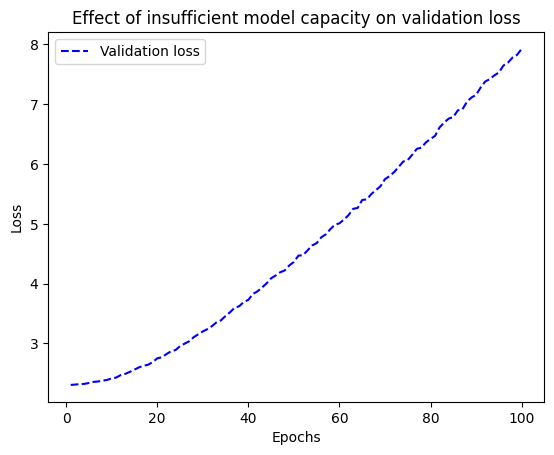

In [ ]:
import matplotlib.pyplot as plt
val_loss = history.history["val_loss"]
epochs = range(1, 101)
plt.plot(epochs, val_loss, "b--",
         label="Validation loss")
plt.title("Effect of insufficient model capacity on validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()



---


- From Training the same model on MNIST data with noise channels or all-zero channels
Add validation accuracy of original data for mnist data.
- Fitting a MNIST model with randomly shuffled labels.
Visualize training accuracy and validation accuracy.

#### The manifold hypothesis

#### Interpolation as a source of generalization

#### Why deep learning works

#### Training data is paramount

## Evaluating machine-learning models

### Training, validation, and test sets

#### Simple hold-out validation

#### K-fold validation

#### Iterated K-fold validation with shuffling

### Beating a common-sense baseline

### Things to keep in mind about model evaluation

## Improving model fit

### Tuning key gradient descent parameters

**Training a MNIST model with an incorrectly high learning rate**

In [ ]:
(train_images, train_labels), _ = mnist.load_data()
train_images = train_images.reshape((60000, 28 * 28))
train_images = train_images.astype("float32") / 255

model = keras.Sequential([
    layers.Dense(512, activation="relu"),
    layers.Dense(10, activation="softmax")
])
model.compile(optimizer=keras.optimizers.RMSprop(1.),
              loss="sparse_categorical_crossentropy",
              metrics=["accuracy"])
model.fit(train_images, train_labels,
          epochs=10,
          batch_size=128,
          validation_split=0.2)

#val_loss: 2.9376 - val_accuracy: 성능 떨어짐 -> learning rate 바꿔서 해결해봐

Epoch 1/10
375/375 [==============================] - 2s 4ms/step - loss: 764.2247 - accuracy: 0.3398 - val_loss: 2.1705 - val_accuracy: 0.1945
Epoch 2/10
375/375 [==============================] - 1s 3ms/step - loss: 2.7037 - accuracy: 0.1743 - val_loss: 2.5730 - val_accuracy: 0.1152
Epoch 3/10
375/375 [==============================] - 1s 3ms/step - loss: 2.3819 - accuracy: 0.1593 - val_loss: 2.1888 - val_accuracy: 0.1877
Epoch 4/10
375/375 [==============================] - 1s 3ms/step - loss: 2.6216 - accuracy: 0.1838 - val_loss: 2.2136 - val_accuracy: 0.1716
Epoch 5/10
375/375 [==============================] - 2s 4ms/step - loss: 2.3954 - accuracy: 0.1800 - val_loss: 2.2342 - val_accuracy: 0.1817
Epoch 6/10
375/375 [==============================] - 2s 4ms/step - loss: 2.4246 - accuracy: 0.1807 - val_loss: 2.2799 - val_accuracy: 0.1852
Epoch 7/10
375/375 [==============================] - 1s 3ms/step - loss: 2.2551 - accuracy: 0.1831 - val_loss: 2.4028 - val_accuracy: 0.1608
Epoc

**The same model with a more appropriate learning rate**

In [ ]:
model = keras.Sequential([
    layers.Dense(512, activation="relu"),
    layers.Dense(10, activation="softmax")
])
model.compile(optimizer=keras.optimizers.RMSprop(1e-2), #> learning rate 바꿔서 해결한 거
              loss="sparse_categorical_crossentropy",
              metrics=["accuracy"])
model.fit(train_images, train_labels,
          epochs=10,
          batch_size=128,
          validation_split=0.2)

Epoch 1/10
375/375 [==============================] - 2s 4ms/step - loss: 0.3775 - accuracy: 0.9096 - val_loss: 0.1649 - val_accuracy: 0.9569
Epoch 2/10
375/375 [==============================] - 1s 3ms/step - loss: 0.1255 - accuracy: 0.9648 - val_loss: 0.1193 - val_accuracy: 0.9687
Epoch 3/10
375/375 [==============================] - 1s 3ms/step - loss: 0.0916 - accuracy: 0.9742 - val_loss: 0.1289 - val_accuracy: 0.9681
Epoch 4/10
375/375 [==============================] - 1s 3ms/step - loss: 0.0775 - accuracy: 0.9794 - val_loss: 0.1538 - val_accuracy: 0.9722
Epoch 5/10
375/375 [==============================] - 1s 3ms/step - loss: 0.0673 - accuracy: 0.9830 - val_loss: 0.1572 - val_accuracy: 0.9717
Epoch 6/10
375/375 [==============================] - 1s 3ms/step - loss: 0.0547 - accuracy: 0.9862 - val_loss: 0.1587 - val_accuracy: 0.9748
Epoch 7/10
375/375 [==============================] - 2s 4ms/step - loss: 0.0493 - accuracy: 0.9886 - val_loss: 0.1798 - val_accuracy: 0.9733
Epoch 

### Leveraging better architecture priors

### Increasing model capacity

**A simple logistic regression on MNIST**

In [ ]:
model = keras.Sequential([layers.Dense(10, activation="softmax")])  #레이어 1개 - simple logistic regression
model.compile(optimizer="rmsprop",
              loss="sparse_categorical_crossentropy",
              metrics=["accuracy"])
history_small_model = model.fit(
    train_images, train_labels,
    epochs=20,
    batch_size=128,
    validation_split=0.2)

Epoch 1/20
375/375 [==============================] - 2s 3ms/step - loss: 0.6720 - accuracy: 0.8330 - val_loss: 0.3597 - val_accuracy: 0.9011
Epoch 2/20
375/375 [==============================] - 1s 3ms/step - loss: 0.3538 - accuracy: 0.9023 - val_loss: 0.3110 - val_accuracy: 0.9126
Epoch 3/20
375/375 [==============================] - 1s 3ms/step - loss: 0.3182 - accuracy: 0.9113 - val_loss: 0.2937 - val_accuracy: 0.9183
Epoch 4/20
375/375 [==============================] - 1s 3ms/step - loss: 0.3023 - accuracy: 0.9160 - val_loss: 0.2851 - val_accuracy: 0.9222
Epoch 5/20
375/375 [==============================] - 1s 3ms/step - loss: 0.2920 - accuracy: 0.9182 - val_loss: 0.2787 - val_accuracy: 0.9227
Epoch 6/20
375/375 [==============================] - 2s 4ms/step - loss: 0.2857 - accuracy: 0.9208 - val_loss: 0.2755 - val_accuracy: 0.9244
Epoch 7/20
375/375 [==============================] - 1s 3ms/step - loss: 0.2808 - accuracy: 0.9216 - val_loss: 0.2723 - val_accuracy: 0.9258
Epoch 

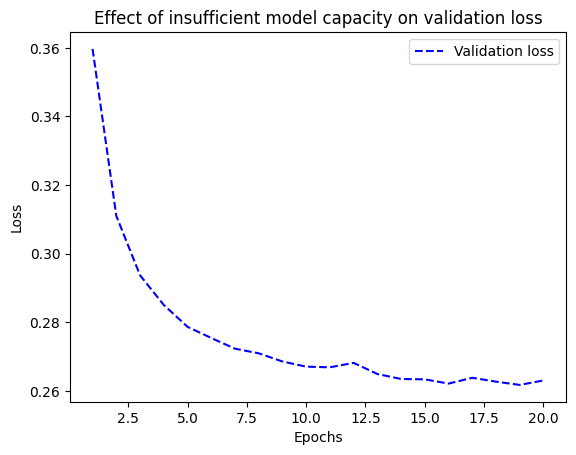

In [ ]:
import matplotlib.pyplot as plt
val_loss = history_small_model.history["val_loss"]
epochs = range(1, 21)
plt.plot(epochs, val_loss, "b--",
         label="Validation loss")
plt.title("Effect of insufficient model capacity on validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()

In [ ]:
model = keras.Sequential([
    layers.Dense(96, activation="relu"),
    layers.Dense(96, activation="relu"),
    layers.Dense(10, activation="softmax"),
])
model.compile(optimizer="rmsprop",
              loss="sparse_categorical_crossentropy",
              metrics=["accuracy"])
history_large_model = model.fit(
    train_images, train_labels,
    epochs=20,
    batch_size=128,
    validation_split=0.2)

Epoch 1/20
375/375 [==============================] - 2s 5ms/step - loss: 0.3703 - accuracy: 0.8959 - val_loss: 0.2195 - val_accuracy: 0.9323
Epoch 2/20
375/375 [==============================] - 1s 3ms/step - loss: 0.1683 - accuracy: 0.9498 - val_loss: 0.1408 - val_accuracy: 0.9597
Epoch 3/20
375/375 [==============================] - 1s 4ms/step - loss: 0.1190 - accuracy: 0.9642 - val_loss: 0.1233 - val_accuracy: 0.9642
Epoch 4/20
375/375 [==============================] - 2s 4ms/step - loss: 0.0899 - accuracy: 0.9731 - val_loss: 0.1034 - val_accuracy: 0.9689
Epoch 5/20
375/375 [==============================] - 2s 4ms/step - loss: 0.0721 - accuracy: 0.9785 - val_loss: 0.1096 - val_accuracy: 0.9676
Epoch 6/20
375/375 [==============================] - 1s 3ms/step - loss: 0.0591 - accuracy: 0.9817 - val_loss: 0.0928 - val_accuracy: 0.9734
Epoch 7/20
375/375 [==============================] - 1s 4ms/step - loss: 0.0490 - accuracy: 0.9850 - val_loss: 0.0932 - val_accuracy: 0.9729
Epoch 

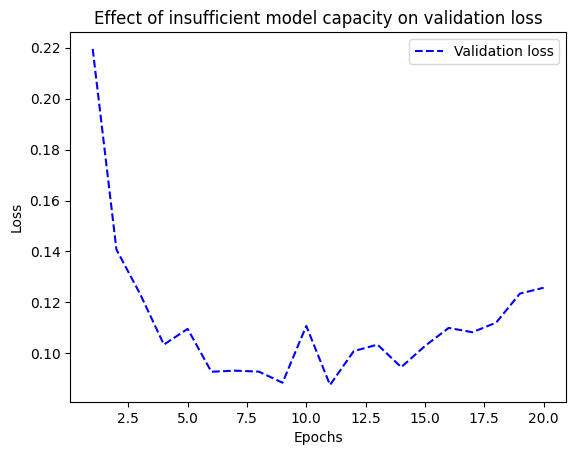

In [ ]:
import matplotlib.pyplot as plt
val_loss = history_large_model.history["val_loss"]
epochs = range(1, 21)
plt.plot(epochs, val_loss, "b--",
         label="Validation loss")
plt.title("Effect of insufficient model capacity on validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend() #overfitting
#lowest : 0.26 이었음 small model 은
#이게 더 나을지도 0.05정도로 떨어짐 , overfitting 전에 끊으면 이 모델이 더 나음

## Improving generalization

### Dataset curation

### Feature engineering

### Using early stopping

### Regularizing your model

#### Reducing the network's size

**Original model**

In [ ]:
from tensorflow.keras.datasets import imdb
(train_data, train_labels), _ = imdb.load_data(num_words=10000)

def vectorize_sequences(sequences, dimension=10000):
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        results[i, sequence] = 1.
    return results
train_data = vectorize_sequences(train_data)

model = keras.Sequential([
    layers.Dense(16, activation="relu"),
    layers.Dense(16, activation="relu"),
    layers.Dense(1, activation="sigmoid")
])
model.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])
history_original = model.fit(train_data, train_labels,
                             epochs=20, batch_size=512, validation_split=0.4)

Epoch 1/20
30/30 [==============================] - 5s 115ms/step - loss: 0.5451 - accuracy: 0.7721 - val_loss: 0.4225 - val_accuracy: 0.8597
Epoch 2/20
30/30 [==============================] - 1s 23ms/step - loss: 0.3445 - accuracy: 0.8922 - val_loss: 0.3479 - val_accuracy: 0.8625
Epoch 3/20
30/30 [==============================] - 1s 24ms/step - loss: 0.2556 - accuracy: 0.9169 - val_loss: 0.2889 - val_accuracy: 0.8882
Epoch 4/20
30/30 [==============================] - 1s 21ms/step - loss: 0.2057 - accuracy: 0.9316 - val_loss: 0.2798 - val_accuracy: 0.8872
Epoch 5/20
30/30 [==============================] - 1s 22ms/step - loss: 0.1726 - accuracy: 0.9434 - val_loss: 0.2756 - val_accuracy: 0.8913
Epoch 6/20
30/30 [==============================] - 1s 23ms/step - loss: 0.1466 - accuracy: 0.9511 - val_loss: 0.3110 - val_accuracy: 0.8759
Epoch 7/20
30/30 [==============================] - 1s 42ms/step - loss: 0.1288 - accuracy: 0.9595 - val_loss: 0.2922 - val_accuracy: 0.8864
Epoch 8/20
3

Text(0, 0.5, 'Loss')

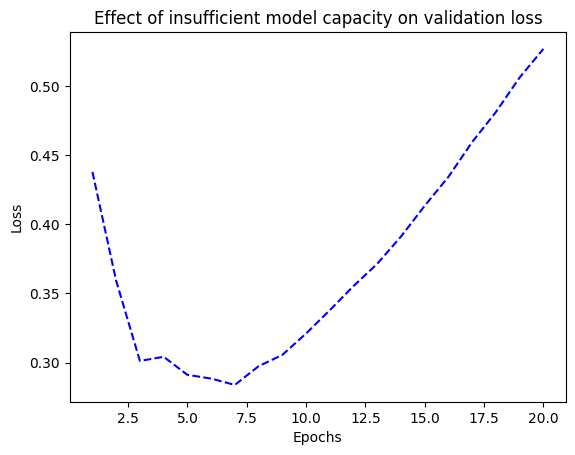

In [ ]:
import matplotlib.pyplot as plt
val_loss = history_original.history["val_loss"]
epochs = range(1, 21)
plt.plot(epochs, val_loss, "b--",
         label="Validation loss")
plt.title("Effect of insufficient model capacity on validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")

**Version of the model with lower capacity**

In [ ]:
model = keras.Sequential([
    layers.Dense(4, activation="relu"), #위의 오리지널 모델에서 44 1 로 바꿈
    layers.Dense(4, activation="relu"),
    layers.Dense(1, activation="sigmoid")
])
model.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])
history_smaller_model = model.fit(
    train_data, train_labels,
    epochs=20, batch_size=512, validation_split=0.4)

Epoch 1/20
30/30 [==============================] - 3s 67ms/step - loss: 0.6443 - accuracy: 0.7131 - val_loss: 0.5952 - val_accuracy: 0.7786
Epoch 2/20
30/30 [==============================] - 1s 22ms/step - loss: 0.5514 - accuracy: 0.8371 - val_loss: 0.5225 - val_accuracy: 0.8212
Epoch 3/20
30/30 [==============================] - 1s 21ms/step - loss: 0.4759 - accuracy: 0.8695 - val_loss: 0.4601 - val_accuracy: 0.8548
Epoch 4/20
30/30 [==============================] - 1s 25ms/step - loss: 0.4115 - accuracy: 0.8879 - val_loss: 0.4085 - val_accuracy: 0.8731
Epoch 5/20
30/30 [==============================] - 1s 22ms/step - loss: 0.3587 - accuracy: 0.9007 - val_loss: 0.3720 - val_accuracy: 0.8757
Epoch 6/20
30/30 [==============================] - 1s 23ms/step - loss: 0.3159 - accuracy: 0.9083 - val_loss: 0.3415 - val_accuracy: 0.8799
Epoch 7/20
30/30 [==============================] - 1s 38ms/step - loss: 0.2812 - accuracy: 0.9168 - val_loss: 0.3245 - val_accuracy: 0.8793
Epoch 8/20
30

Text(0, 0.5, 'Loss')

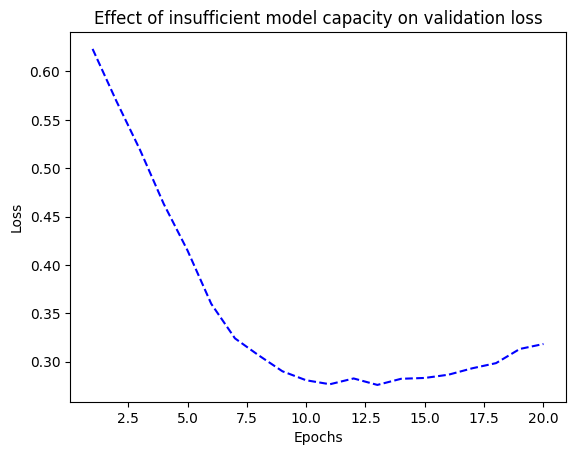

In [ ]:
import matplotlib.pyplot as plt
val_loss = history_smaller_model.history["val_loss"]
epochs = range(1, 21)
plt.plot(epochs, val_loss, "b--",
         label="Validation loss")
plt.title("Effect of insufficient model capacity on validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")

**Version of the model with higher capacity**

In [ ]:
model = keras.Sequential([
    layers.Dense(512, activation="relu"),
    layers.Dense(512, activation="relu"),
    layers.Dense(1, activation="sigmoid")
])
model.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])
history_larger_model = model.fit(
    train_data, train_labels,
    epochs=20, batch_size=512, validation_split=0.4)

Epoch 1/20
30/30 [==============================] - 3s 68ms/step - loss: 0.5704 - accuracy: 0.7403 - val_loss: 0.6588 - val_accuracy: 0.6699
Epoch 2/20
30/30 [==============================] - 1s 28ms/step - loss: 0.3323 - accuracy: 0.8593 - val_loss: 0.3006 - val_accuracy: 0.8733
Epoch 3/20
30/30 [==============================] - 1s 26ms/step - loss: 0.2458 - accuracy: 0.9022 - val_loss: 0.2656 - val_accuracy: 0.8894
Epoch 4/20
30/30 [==============================] - 1s 25ms/step - loss: 0.1734 - accuracy: 0.9341 - val_loss: 0.2779 - val_accuracy: 0.8878
Epoch 5/20
30/30 [==============================] - 1s 28ms/step - loss: 0.1579 - accuracy: 0.9406 - val_loss: 0.3395 - val_accuracy: 0.8730
Epoch 6/20
30/30 [==============================] - 1s 26ms/step - loss: 0.0967 - accuracy: 0.9669 - val_loss: 0.4974 - val_accuracy: 0.8478
Epoch 7/20
30/30 [==============================] - 1s 27ms/step - loss: 0.1211 - accuracy: 0.9592 - val_loss: 0.2904 - val_accuracy: 0.8848
Epoch 8/20
30

Text(0, 0.5, 'Loss')

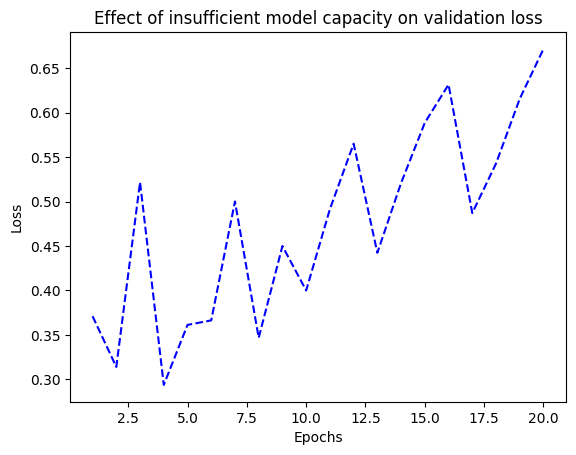

In [ ]:
import matplotlib.pyplot as plt
val_loss = history_larger_model.history["val_loss"]
epochs = range(1, 21)
plt.plot(epochs, val_loss, "b--",
         label="Validation loss")
plt.title("Effect of insufficient model capacity on validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")

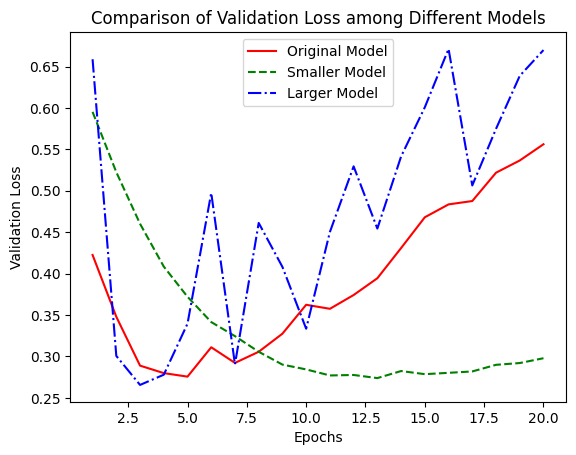

In [ ]:
import matplotlib.pyplot as plt

# 세 가지 모델의 검증 손실 가져오기
val_loss_original = history_original.history["val_loss"]
val_loss_smaller_model = history_smaller_model.history["val_loss"]
val_loss_larger_model = history_larger_model.history["val_loss"]

epochs = range(1, 21)

# original
plt.plot(epochs, val_loss_original, "r-", label="Original Model")

# smaller_model
plt.plot(epochs, val_loss_smaller_model, "g--", label="Smaller Model")

# larger_model
plt.plot(epochs, val_loss_larger_model, "b-.", label="Larger Model")

plt.title("Comparison of Validation Loss among Different Models")
plt.xlabel("Epochs")
plt.ylabel("Validation Loss")
plt.legend()

plt.show()

#### Adding weight regularization

**Adding L2 weight regularization to the model**

In [ ]:
from tensorflow.keras import regularizers
model = keras.Sequential([
    layers.Dense(16,
                 kernel_regularizer=regularizers.l2(0.002), #kernel_regularizer=regularizers.l2(0.002), 이거 넣으면
                 activation="relu"),
    layers.Dense(16,
                 kernel_regularizer=regularizers.l2(0.002),
                 activation="relu"),
    layers.Dense(1, activation="sigmoid")
])
model.compile(optimizer="rmsprop",
              loss="binary_crossentropy", #l2 loss
              metrics=["accuracy"])
history_l2_reg = model.fit(
    train_data, train_labels,
    epochs=20, batch_size=512, validation_split=0.4)

Epoch 1/20
30/30 [==============================] - 3s 65ms/step - loss: 0.6090 - accuracy: 0.7744 - val_loss: 0.4692 - val_accuracy: 0.8690
Epoch 2/20
30/30 [==============================] - 1s 23ms/step - loss: 0.4065 - accuracy: 0.8898 - val_loss: 0.3888 - val_accuracy: 0.8842
Epoch 3/20
30/30 [==============================] - 1s 23ms/step - loss: 0.3260 - accuracy: 0.9164 - val_loss: 0.3627 - val_accuracy: 0.8852
Epoch 4/20
30/30 [==============================] - 1s 25ms/step - loss: 0.2915 - accuracy: 0.9257 - val_loss: 0.3666 - val_accuracy: 0.8809
Epoch 5/20
30/30 [==============================] - 1s 25ms/step - loss: 0.2658 - accuracy: 0.9369 - val_loss: 0.3519 - val_accuracy: 0.8885
Epoch 6/20
30/30 [==============================] - 1s 22ms/step - loss: 0.2517 - accuracy: 0.9403 - val_loss: 0.3613 - val_accuracy: 0.8849
Epoch 7/20
30/30 [==============================] - 1s 24ms/step - loss: 0.2411 - accuracy: 0.9444 - val_loss: 0.3700 - val_accuracy: 0.8820
Epoch 8/20
30

Text(0, 0.5, 'Loss')

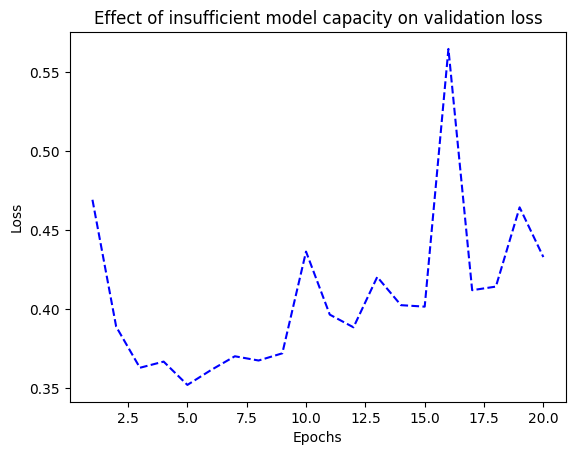

In [ ]:
import matplotlib.pyplot as plt
val_loss = history_l2_reg.history["val_loss"]
epochs = range(1, 21)
plt.plot(epochs, val_loss, "b--",
         label="Validation loss")
plt.title("Effect of insufficient model capacity on validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")

**Different weight regularizers available in Keras**

In [ ]:
from tensorflow.keras import regularizers
regularizers.l1(0.001)
regularizers.l1_l2(l1=0.001, l2=0.001)

#### Adding dropout

**Adding dropout to the IMDB model**

In [ ]:
model = keras.Sequential([
    layers.Dense(16, activation="relu"),
    layers.Dropout(0.5),
    # layers.Dense(16, activation="relu")1, 위의 레이어에 대한 dropout
    layers.Dense(16, activation="relu"),
    layers.Dropout(0.5),
    layers.Dense(1, activation="sigmoid")
])
model.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])
history_dropout = model.fit(
    train_data, train_labels,
    epochs=20, batch_size=512, validation_split=0.4)

Epoch 1/20
30/30 [==============================] - 4s 63ms/step - loss: 0.6317 - accuracy: 0.6353 - val_loss: 0.5234 - val_accuracy: 0.8298
Epoch 2/20
30/30 [==============================] - 1s 24ms/step - loss: 0.5115 - accuracy: 0.7604 - val_loss: 0.3997 - val_accuracy: 0.8713
Epoch 3/20
30/30 [==============================] - 1s 22ms/step - loss: 0.4270 - accuracy: 0.8193 - val_loss: 0.3352 - val_accuracy: 0.8779
Epoch 4/20
30/30 [==============================] - 1s 24ms/step - loss: 0.3630 - accuracy: 0.8571 - val_loss: 0.3033 - val_accuracy: 0.8849
Epoch 5/20
30/30 [==============================] - 1s 22ms/step - loss: 0.3161 - accuracy: 0.8849 - val_loss: 0.2964 - val_accuracy: 0.8838
Epoch 6/20
30/30 [==============================] - 1s 22ms/step - loss: 0.2761 - accuracy: 0.9036 - val_loss: 0.2893 - val_accuracy: 0.8848
Epoch 7/20
30/30 [==============================] - 1s 37ms/step - loss: 0.2399 - accuracy: 0.9211 - val_loss: 0.2776 - val_accuracy: 0.8918
Epoch 8/20
30

Text(0, 0.5, 'Loss')

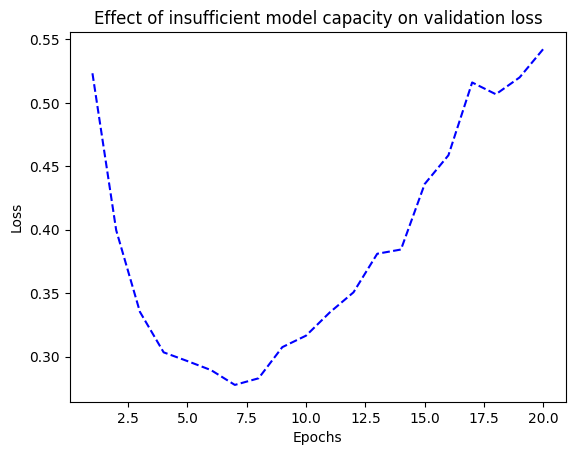

In [ ]:
import matplotlib.pyplot as plt
val_loss = history_dropout.history["val_loss"]
epochs = range(1, 21)
plt.plot(epochs, val_loss, "b--",
         label="Validation loss")
plt.title("Effect of insufficient model capacity on validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")

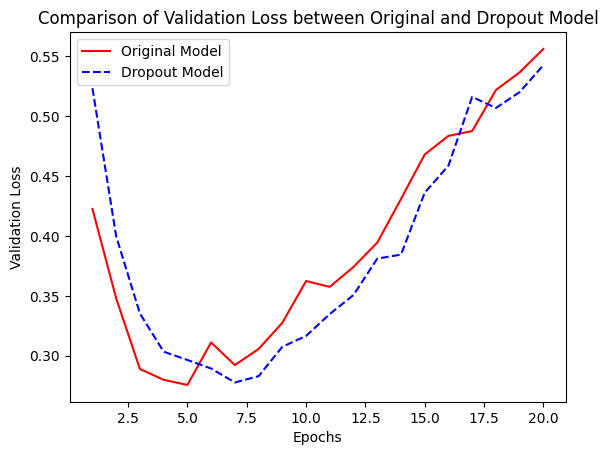

In [ ]:
import matplotlib.pyplot as plt

# 원래 모델의 검증 손실과 드롭아웃을 적용한 모델의 검증 손실 가져오기
val_loss_original = history_original.history["val_loss"]
val_loss_dropout = history_dropout.history["val_loss"]

epochs = range(1, 21)

# 원래 모델의 검증 손실 그래프 그리기
plt.plot(epochs, val_loss_original, "r-", label="Original Model")

# 드롭아웃을 적용한 모델의 검증 손실 그래프 그리기
plt.plot(epochs, val_loss_dropout, "b--", label="Dropout Model")

plt.title("Comparison of Validation Loss between Original and Dropout Model")
plt.xlabel("Epochs")
plt.ylabel("Validation Loss")
plt.legend()

plt.show()

-  From Tuning key gradient descent parameters,
Modify learning rates and check when model fails
- Visualize validation loss of the original model, model with lower capacity and model
with larger capacity
- Visualize validation loss of the original model and model with dropout

## Summary